In [1]:
import sys
import requests
import json

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import io
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

# Web scraping

In [2]:
response_obj = requests.get("https://en.wikipedia.org/wiki/List_of_districts_in_South_Korea").text
soup = BeautifulSoup(response_obj,"lxml")
District_Table = soup.find("table", {"class":"wikitable sortable"})
District_Table

<table class="wikitable sortable" style="text-align:right;">
<tbody><tr>
<th>District</th>
<th><a href="/wiki/Korean_language" title="Korean language">Korean</a></th>
<th><a href="/wiki/Hanja" title="Hanja">Hanja</a></th>
<th>City</th>
<th>Population<br/><span style="font-size:85%;">(2012)</span></th>
<th>Area</th>
<th>Founded<br/><span style="font-size:85%;">(YYYY-MM-DD)</span></th>
<th>Type
</th></tr>
<tr>
<td align="left"><a href="/wiki/Danwon-gu" title="Danwon-gu">Danwon-gu</a>
</td>
<td align="left"><span style="font-size:125%;"><span lang="ko" title="Korean-language text">단원구</span></span>
</td>
<td align="left"><span style="font-size:125%;"><span lang="ko" title="Korean-language text">檀園區</span></span>
</td>
<td align="left"><a href="/wiki/Ansan" title="Ansan">Ansan</a>
</td>
<td>335,849
</td>
<td>91.23
</td>
<td>2002-11-01
</td>
<td align="left">Non-autonomous
</td></tr>
<tr>
<td align="left"><a href="/wiki/Sangnok-gu" title="Sangnok-gu">Sangnok-gu</a>
</td>
<td align="left"><s

In [3]:
# Preparing for the table
District=[]
Korean = []
Hanja = []
City = []
Population = []
Area = []
Founded = []
Type = []

In [4]:
for row in District_Table.findAll("tr"):
    #print (row)    
    District_Korea = row.findAll('td')
    #print (len(Ward))
    print (District_Korea)
    if len(District_Korea)==8: #Only extract table body not heading
        print (District_Korea[0])
        District.append(District_Korea[0].find(text=True))
        Korean.append(District_Korea[1].find(text=True)) # useless
        Hanja.append(District_Korea[2].find(text=True))
        City.append(District_Korea[3].find(text=True))
        Population.append(District_Korea[4].find(text=True))
        Area.append(District_Korea[5].find(text=True))
        Founded.append(District_Korea[6].find(text=True))

[]
[<td align="left"><a href="/wiki/Danwon-gu" title="Danwon-gu">Danwon-gu</a>
</td>, <td align="left"><span style="font-size:125%;"><span lang="ko" title="Korean-language text">단원구</span></span>
</td>, <td align="left"><span style="font-size:125%;"><span lang="ko" title="Korean-language text">檀園區</span></span>
</td>, <td align="left"><a href="/wiki/Ansan" title="Ansan">Ansan</a>
</td>, <td>335,849
</td>, <td>91.23
</td>, <td>2002-11-01
</td>, <td align="left">Non-autonomous
</td>]
<td align="left"><a href="/wiki/Danwon-gu" title="Danwon-gu">Danwon-gu</a>
</td>
[<td align="left"><a href="/wiki/Sangnok-gu" title="Sangnok-gu">Sangnok-gu</a>
</td>, <td align="left"><span style="font-size:125%;"><span lang="ko" title="Korean-language text">상록구</span></span>
</td>, <td align="left"><span style="font-size:125%;"><span lang="ko" title="Korean-language text">常綠區</span></span>
</td>, <td align="left"><a href="/wiki/Ansan" title="Ansan">Ansan</a>
</td>, <td>380,574
</td>, <td>57.83
</td>, <td>20

In [5]:
import pandas as pd
District_df = pd.DataFrame(list(zip(District, City, Population, Area)),
              columns=['District','City', 'Population','Area'])

In [6]:
District_df.head()

,District,City,Population,Area
0,Danwon-gu,Ansan,"335,849\n",91.23\n
1,Sangnok-gu,Ansan,"380,574\n",57.83\n
2,Dongan-gu,Anyang,"353,381\n",21.92\n
3,Manan-gu,Anyang,"265,462\n",36.54\n
4,Buk District,Busan,"309,602\n",39.44\n


In [7]:
#Create new dataframe that only contain Seoul District
seoul_district = District_df[District_df.City == 'Seoul']
seoul_district.head()

,District,City,Population,Area
65,Dobong District,Seoul,"366,879\n",20.70\n
66,Dongdaemun District,Seoul,"366,633\n",14.20\n
67,Dongjak District,Seoul,"402,567\n",16.35\n
68,Eunpyeong District,Seoul,"491,741\n",29.71\n
69,Gangbuk District,Seoul,"345,502\n",23.61\n


In [8]:
#Reset index for new dataframe so it starts from 1
seoul_district.index = np.arange(1, len(seoul_district) + 1)

In [10]:
seoul_district.head()

,District,City,Population,Area
1,Dobong District,Seoul,"366,879\n",20.70\n
2,Dongdaemun District,Seoul,"366,633\n",14.20\n
3,Dongjak District,Seoul,"402,567\n",16.35\n
4,Eunpyeong District,Seoul,"491,741\n",29.71\n
5,Gangbuk District,Seoul,"345,502\n",23.61\n


In [27]:
# The code was removed by Watson Studio for sharing.

,Unnamed: 0,District,Latitude,Longtitude
0,1,Dobong District,37.665861,127.031767
1,2,Dongdaemun District,37.583801,127.050700
2,3,Dongjak District,37.496504,126.944307
3,4,Eunpyeong District,37.617612,126.922700
4,5,Gangbuk District,37.646995,127.014716


In [28]:
# Drop unnamed column
df_geo.drop(df_geo.columns[df_geo.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [29]:
df_geo.head()

,District,Latitude,Longtitude
0,Dobong District,37.665861,127.031767
1,Dongdaemun District,37.583801,127.050700
2,Dongjak District,37.496504,126.944307
3,Eunpyeong District,37.617612,126.922700
4,Gangbuk District,37.646995,127.014716


In [30]:
#Merge with previous dataframe
df_seoul = pd.merge(seoul_district, df_geo, how='left',
        left_on='District', right_on='District', validate="1:1")
df_seoul.head()

,District,City,Population,Area,Latitude,Longtitude
0,Dobong District,Seoul,"366,879\n",20.70\n,37.665861,127.031767
1,Dongdaemun District,Seoul,"366,633\n",14.20\n,37.583801,127.050700
2,Dongjak District,Seoul,"402,567\n",16.35\n,37.496504,126.944307
3,Eunpyeong District,Seoul,"491,741\n",29.71\n,37.617612,126.922700
4,Gangbuk District,Seoul,"345,502\n",23.61\n,37.646995,127.014716


## Visualization of District in Seoul¶

In [44]:
!pip install geopy
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

geolocator = Nominatim(user_agent="Final Capstone Project")

location = geolocator.geocode('Seoul, South Korea')
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Seoul are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Seoul are 37.5666791, 126.9782914.


In [45]:
!conda install -c conda-forge folium=0.5.0 --yes 
import folium

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |           1_llvm           5 KB  conda-forge
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    _pytorch_select-0.2        |            gpu_0           2 KB
    absl-py-0.12.0             |     pyhd8ed1ab_0          96 KB  conda-forge
    aiohttp-3.7.4              |   py37h5e8e339_0         632 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
   

In [49]:
map_seoul = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map

for lat, lng, label in zip(df_seoul['Latitude'], df_seoul['Longtitude'], df_seoul['District']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_seoul)
    
map_seoul

## Foursquare API

In [50]:
CLIENT_ID = 'Q23W1PNEKFDDEIETRITO11RF5OLSR1EJEZADKHSFN2VWOB0G'
CLIENT_SECRET = 'BZYE1RCZXTXPBHCKMO5RRP3IS1NXNTOZSJ41JE43IICL2B0P' 
VERSION = '20210327'
LIMIT = 30
print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: Q23W1PNEKFDDEIETRITO11RF5OLSR1EJEZADKHSFN2VWOB0G
CLIENT_SECRET:BZYE1RCZXTXPBHCKMO5RRP3IS1NXNTOZSJ41JE43IICL2B0P


In [51]:
radius = 1000
LIMIT = 100

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'Dist_Latitude', 
                  'Dist_Longitude', 
                  'Venue', 
                  'Venue_Lat', 
                  'Venue_Long', 
                  'Venue_Category']
    
    return(nearby_venues)

In [52]:
#Get nearby venues for all district in Seoul
Seoul_Venues = getNearbyVenues(names=df_seoul['District'],
                                   latitudes=df_seoul['Latitude'],
                                   longitudes=df_seoul['Longtitude']
                                  )

Dobong District
Dongdaemun District
Dongjak District
Eunpyeong District
Gangbuk District
Gangdong District
Gangnam District
Gangseo District
Geumcheon District
Guro District
Gwanak District
Gwangjin District
Jongno District
Jung District
Jungnang District
Mapo District
Nowon District
Seocho District
Seodaemun District
Seongbuk District
Seongdong District
Songpa District
Yangcheon District
Yeongdeungpo District
Yongsan District


In [53]:
print ("Shape of the Venues Dataframe: ", Seoul_Venues.shape)
Seoul_Venues.head()

Shape of the Venues Dataframe:  (1200, 7)


,District,Dist_Latitude,Dist_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
0,Dobong District,37.665861,127.031767,방학동 도깨비시장,37.665427,127.035603,Market
1,Dobong District,37.665861,127.031767,수정궁,37.662404,127.032934,Chinese Restaurant
2,Dobong District,37.665861,127.031767,대문,37.663411,127.027870,Korean Restaurant
3,Dobong District,37.665861,127.031767,발바닥공원,37.659431,127.029371,Park
4,Dobong District,37.665861,127.031767,PARIS BAGUETTE,37.662556,127.032938,Bakery


In [63]:
#Create dataframe only contains café

seoul_cafe = Seoul_Venues[Seoul_Venues['Venue_Category']\
                                                          .str.contains('Coffee')].reset_index(drop=True)
seoul_cafe.index = np.arange(1, len(seoul_cafe)+1)
print ("Shape of the Data-Frame with Venue Category café only: ", seoul_cafe.shape)
seoul_cafe.head()

Shape of the Data-Frame with Venue Category café only:  (144, 7)


,District,Dist_Latitude,Dist_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
1,Dongdaemun District,37.583801,127.0507,Starbucks,37.590782,127.056468,Coffee Shop
2,Dongdaemun District,37.583801,127.0507,Starbucks (스타벅스),37.591625,127.052225,Coffee Shop
3,Dongdaemun District,37.583801,127.0507,The Coffee Bean & Tea Leaf (커피빈),37.592438,127.052574,Coffee Shop
4,Dongdaemun District,37.583801,127.0507,EDIYA COFFEE,37.583361,127.055001,Coffee Shop
5,Dongdaemun District,37.583801,127.0507,TWOSOME+ COFFEE,37.592275,127.052365,Coffee Shop


In [69]:
#Cafe maps in Seoul
map_cafe = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the Venues based on the Major Districts
Districts = seoul_cafe['District']

x = np.arange(len(Districts))

for lat, lng, poi, distr in zip(seoul_cafe['Venue_Lat'], 
                                  seoul_cafe['Venue_Long'], 
                                  seoul_cafe['Venue_Category'], 
                                  seoul_cafe['District']):
    label = folium.Popup(str(poi) + ' ' + str(distr), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cafe)
       
map_cafe

## Number of Cafe in each districts in Seoul

In [80]:
pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 16.6 MB/s eta 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.4
    Uninstalling matplotlib-3.3.4:
      Successfully uninstalled matplotlib-3.3.4
Note: you may need to restart the kernel to use updated packages.


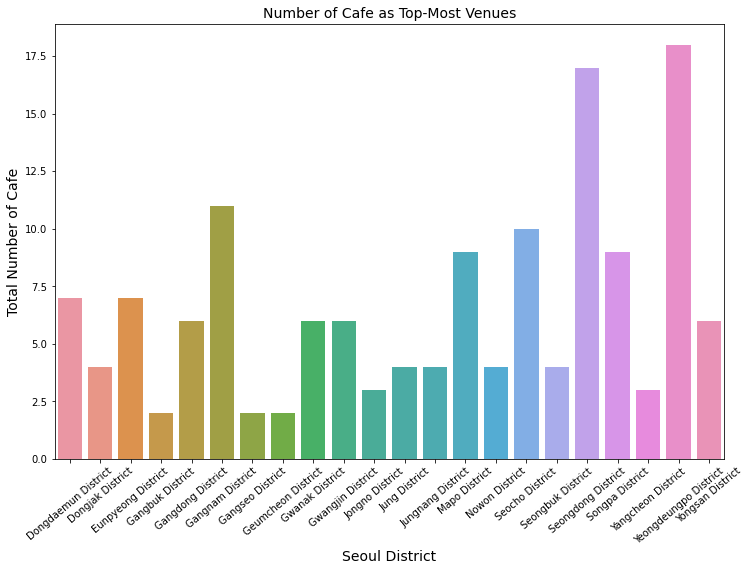

In [106]:
Seoul_venues_cafe = seoul_cafe.groupby(['District'])['Venue_Category'].apply(lambda x: x[x.str.contains('Coffee')].count())
Seoul_venues_cafe_df = Seoul_venues_cafe.to_frame().reset_index()
Seoul_venues_cafe_df.columns = ['District', 'Number of Cafe']
Seoul_venues_cafe_df.index = np.arange(1,len(Seoul_venues_cafe_df)+1)

fig = plt.figure(figsize=(12,8))
bar = sns.barplot(x='District', y='Number of Cafe', data=Seoul_venues_cafe_df)

bar.set_ylabel("Total Number of Cafe", fontsize=14)
bar.set_xlabel("Seoul District", fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
bar.set_title("Number of Cafe as Top-Most Venues", fontsize=14)
plt.show()

In [122]:
print("Number of cafe in each districts in Seoul")
Seoul_venues_cafe_df.sort_values(by=['Number of Cafe'], axis=0, ascending=False)

Number of cafe in each districts in Seoul


,District,Number of Cafe
21,Yeongdeungpo District,18
18,Seongdong District,17
6,Gangnam District,11
16,Seocho District,10
19,Songpa District,9
14,Mapo District,9
1,Dongdaemun District,7
3,Eunpyeong District,7
10,Gwangjin District,6
22,Yongsan District,6
